In [17]:
import sys
sys.path.append('/Users/michal/PythonProjects/MOTIVE')
from simulation_data import *
from imports_file import *

### upload dataset

In [24]:
dst_path = os.path.join(data_path_psd1d, "psd1_test.nc")
dat_dst = Dataset(dst_path, 'r')
freq = dat_dst.variables['freq'][:]
psd = dat_dst.variables['psd'][:]
depths = dat_dst.variables['depths'][:]
dat_dst.close()

### plot psd

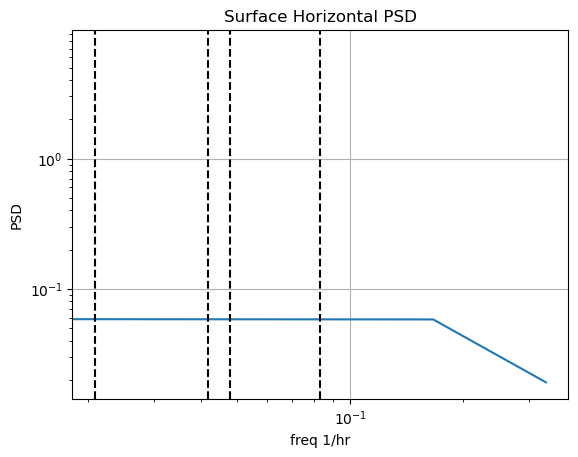

In [25]:
plt.plot(freq, psd.mean(axis=0))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('freq 1/hr')
plt.ylabel('PSD')
plt.title('Surface Horizontal PSD')
plt.grid(True)
plt.axvline(1/12,0,1e8, linestyle='--', c='k')
plt.axvline(1/24,0,1e8, linestyle='--', c='k')
plt.axvline(1/48,0,1e8, linestyle='--', c='k')
f_cor = 2 * 2 * np.pi / 24 * np.sin(np.deg2rad(35)) / 2 / np.pi
plt.axvline(f_cor,0,1e8, linestyle='--', c='k')
# plt.legend(['All freq forcing', 'Low freq forcing', '48$hr^{-1}$, 24$hr^{-1}$, $f_{cor}$, 12$hr^{-1}$'])
plt.show()

In [12]:
import socket
print(socket.gethostname())

Michals-MacBook-Pro.local


In [26]:
psd

masked_array(
  data=[[2.83665333e+01, 1.36151090e-01, 4.37989645e-02],
        [2.76682072e+01, 1.25184745e-01, 4.09757830e-02],
        [2.69572372e+01, 1.16758607e-01, 3.86392213e-02],
        [2.56711197e+01, 1.09984033e-01, 3.63811255e-02],
        [2.43447495e+01, 1.07654326e-01, 3.60074602e-02],
        [2.30663052e+01, 1.06483050e-01, 3.56878191e-02],
        [2.08021221e+01, 1.06270388e-01, 3.55672538e-02],
        [1.84072571e+01, 1.06884271e-01, 3.57573852e-02],
        [1.61630898e+01, 1.07501984e-01, 3.58020477e-02],
        [1.39531965e+01, 1.08245112e-01, 3.59112956e-02],
        [9.66846180e+00, 1.10190704e-01, 3.61063108e-02],
        [6.01104021e+00, 1.12932548e-01, 3.81823070e-02],
        [3.55491281e+00, 1.08255431e-01, 3.74495126e-02],
        [2.93258739e+00, 9.84957963e-02, 3.36422063e-02],
        [3.64889264e+00, 8.03706720e-02, 2.79649310e-02],
        [4.51849413e+00, 6.28995523e-02, 2.21618041e-02],
        [4.91751957e+00, 5.32249510e-02, 1.88959893e-02],
